### Importing the Dataset


Dataset: https://www.kaggle.com/c/fake-news/data#

In [ ]:
import pandas as pd
import re

In [ ]:
df = pd.read_csv('fake-news/train.csv')

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

### Get the Independent Features

In [ ]:
X = df.drop('label', axis=1)

In [ ]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


### Get the Dependent features

In [ ]:
y=df['label']

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
df.shape

(20800, 5)

In [ ]:
df = df.dropna()

In [ ]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
messages=df.copy()

In [ ]:
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
messages.reset_index(inplace=True)

In [ ]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

### Cleaning the Texts and Applying Stemming

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[6]

'beno hamon win french socialist parti presidenti nomin new york time'

### Making a BagOfWords Model using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(18285, 5000)

In [ ]:
y=messages['label']

### Divide the dataset into Train and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
cv.get_feature_names()[:15]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york']

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [ ]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

### Plotting the Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import itertools

Accuracy: 0.901
Confusion matrix, without normalization


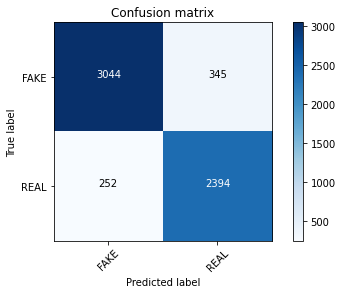

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

score = accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Multinomial Classifier with Hyper Parameter Tuning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.8906379453189727
Alpha: 0.1, Score : 0.9012427506213753
Alpha: 0.2, Score : 0.9015741507870754
Alpha: 0.30000000000000004, Score : 0.9015741507870754
Alpha: 0.4, Score : 0.9007456503728252
Alpha: 0.5, Score : 0.9005799502899752
Alpha: 0.6000000000000001, Score : 0.9015741507870754
Alpha: 0.7000000000000001, Score : 0.9019055509527755
Alpha: 0.8, Score : 0.9007456503728252
Alpha: 0.9, Score : 0.9009113504556753


### Passive Aggressive Classifier Algorithm

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

In [ ]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)

In [ ]:
score = accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

Accuracy: 0.919


Confusion matrix, without normalization


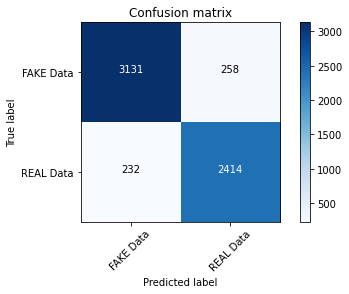

In [ ]:
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Finding the Most Fake and Real words in the News

#### Get Features names

In [ ]:
feature_names = cv.get_feature_names()

In [ ]:
classifier.coef_[0]

array([ -9.10036605,  -8.6227385 ,  -9.10036605, ..., -10.79496178,
        -8.91464891,  -9.32862471])

#### Most Real News

In [ ]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.000126376264419, 'trump'),
 (-4.287849914102974, 'hillari'),
 (-4.396366840720952, 'clinton'),
 (-4.899946945868169, 'elect'),
 (-5.176575820557189, 'new'),
 (-5.2347075860082, 'comment'),
 (-5.273945400633064, 'video'),
 (-5.386793987777445, 'war'),
 (-5.396799073738407, 'us'),
 (-5.4119969346478385, 'hillari clinton'),
 (-5.417114653084819, 'fbi'),
 (-5.4806617042015136, 'vote'),
 (-5.566232695514838, 'email'),
 (-5.578216062401935, 'world'),
 (-5.633992599859346, 'obama'),
 (-5.734478675432337, 'donald'),
 (-5.763072474799078, 'donald trump'),
 (-5.785067496384624, 'russia'),
 (-5.846201884877992, 'day'),
 (-5.862087842466802, 'america')]

#### Most Fake Words in the News

In [ ]:
sorted(zip(classifier.coef_[0], feature_names))[:10]

[(-10.79496177525616, 'abe'),
 (-10.79496177525616, 'abroad'),
 (-10.79496177525616, 'abus new'),
 (-10.79496177525616, 'abus new york'),
 (-10.79496177525616, 'act new'),
 (-10.79496177525616, 'act new york'),
 (-10.79496177525616, 'advic'),
 (-10.79496177525616, 'advis new'),
 (-10.79496177525616, 'advis new york'),
 (-10.79496177525616, 'afford care')]